# Segmentation des clients du site E-Commerce Olist

Olist souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication.

L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.

Le but est de fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Nous utilisererons donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires.

## La mission 

+ La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
+ Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
+ Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
pd.set_option('display.max_column', 47)
pd.set_option('display.max_row', 22551)

### Importation des polices et des caractères

In [3]:
font_title = {"family": "Times New Roman",
              "color":  "blue",
              "weight": "bold",
              "size": 20}

### Importations de tous les datasets

In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

### Description de nos bases de données

In [5]:
def information(dataframe):
    print("{} lignes et {} colonnes".format(dataframe.shape[0],
                                            dataframe.shape[1]))
    print("**"*30)
    print("Informations sur les features : ", dataframe.info())
    print("**"*30)
    print("Le nombre total de valeur manquante : \n", dataframe.isnull().sum())
    print("**"*30)
    print("")
    return dataframe.head(3)

#### customers dataframe

In [6]:
information(customers)

99441 lignes et 5 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
************************************************************



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Les variables importantes du dataset :

+ customer_id : Clé dans le dataset des commandes
+ customer_unique_id : Identifiant unique du client
+ customer_state : Etat du client

Il n'y a pas de valeur manquante dans le dataset 99441

#### geolocation dataframe

In [7]:
information(geolocation)

1000163 lignes et 5 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int6

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


#### order items dataframe

In [8]:
information(items)

112650 lignes et 7 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price           

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Les variables importantes du dataset :

+ order_id : Identifiant de la commande
+ order_item_id : ligne de la commande
+ product_id : Identifiant unique du produit
+ seller_id : Identifiant du vendeur
+ price : prix de la ligne de commande
+ freight_value : cout du transport de la ligne

Il n'y a pas de valeur manquante dans le dataset 112650

### order_payments dataframe

In [9]:
information(payments)

103886 lignes et 5 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
************************************************************



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Les variables importantes du dataset :

Nous retrouvons identifiant unique de la commande 'order_id'

+ payment_sequential : une ligne est crée par moyen de payment utilisé
+ payment_type : La méthode de payment utilisé
+ payment_installments : nombre de versements pour payer

Il n'y a pas de valeur manquante dans le dataset 103886

### order_reviews dataframe

In [10]:
information(reviews)

100000 lignes et 7 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       8

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Les variables importantes du dataset :

Nous retrouvons identifiant unique de la commande 'order_id'

+ review_score : La note donnée suite à la commande effectué

Il y a des valeurs manquantes présente dans le dataset mais pas pour notre variable importe 

### orders dataframe

In [11]:
information(orders)

99441 lignes et 8 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 order_id                           

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Nous disposons de variables 'temps' au format object, nous allons les convertir au format datetime pour pouvoir les utiliser

### products dataframe

In [12]:
information(products)

32951 lignes et 9 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Informations sur les features :  None
************************************************************
Le nombre total de valeur 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Nous allons pouvoir supprimmer les variables dimensions de notre dataset, c'est à dire 
'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'

### categories dataframe

In [13]:
information(translation)

71 lignes et 2 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 product_category_name            0
product_category_name_english    0
dtype: int64
************************************************************



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


Nous allons pouvoir remplacer product_category_name dans le dataset des products par son equivalent en anglais

### Seller dataframe

In [14]:
information(sellers)

3095 lignes et 4 colonnes
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Informations sur les features :  None
************************************************************
Le nombre total de valeur manquante : 
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
************************************************************



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Ce dataset n'est pas interessant dans la mesure ou notre analyse se concentre sur les clients et non les vendeurs

# Merge des datasets

In [15]:
# merge de products et categorie pour avoir les produits en anglais
products = pd.merge(products, translation,
                    how="left",
                    on="product_category_name")

del_features = ["product_category_name", "product_weight_g",
                "product_length_cm", "product_height_cm",
                "product_width_cm"]
products.drop(del_features, axis=1, inplace=True)

In [16]:
# product merging with item
product_item = pd.merge(products, items, on="product_id")

del_features = ['seller_id', 'shipping_limit_date']
product_item.drop(del_features, axis=1, inplace=True)

In [17]:
# merge de payment avec order
payment_order = pd.merge(payments, orders, on='order_id')

In [18]:
# merge de payment_order avec les review
payment_order_review = pd.merge(payment_order, reviews, on='order_id')
del_features = ["review_id", "review_comment_title", 'review_comment_message',
                "review_creation_date", "review_answer_timestamp"]
payment_order_review.drop(del_features, axis=1, inplace=True)

In [19]:
payment_order_review

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,5
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,5
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,5
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104480,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,5
104481,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,5
104482,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,1
104483,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,5


In [20]:
# merge de payment_order_review avec customers
pay_ord_rev_cust = pd.merge(payment_order_review, customers, on='customer_id')

In [21]:
# merge final
df = pd.merge(pay_ord_rev_cust, product_item, on='order_id')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   payment_sequential             118315 non-null  int64  
 2   payment_type                   118315 non-null  object 
 3   payment_installments           118315 non-null  int64  
 4   payment_value                  118315 non-null  float64
 5   customer_id                    118315 non-null  object 
 6   order_status                   118315 non-null  object 
 7   order_purchase_timestamp       118315 non-null  object 
 8   order_approved_at              118300 non-null  object 
 9   order_delivered_carrier_date   117061 non-null  object 
 10  order_delivered_customer_date  115727 non-null  object 
 11  order_estimated_delivery_date  118315 non-null  object 
 12  review_score                  

## Etude des valeurs manquantes et dupliqué dans notre dataset

Nous voyons qu'il existe des variables avec des valeurs manquantes, nous allons jeter un oeil à cela

In [23]:
df.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                          0
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_category_name_english    1734
order_item_id                       0
price                               0
freight_value                       0
dtype: int64

Informartion sur le retard de colis avec les deux order delivered order_delivered_carrier_date et order_estimated_delivery_date

In [24]:
df.dropna(subset=["order_approved_at", "order_delivered_customer_date",
                  "product_name_lenght", "product_description_lenght",
                  'product_category_name_english', 'product_photos_qty'], axis=0, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114052 entries, 0 to 118314
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114052 non-null  object 
 1   payment_sequential             114052 non-null  int64  
 2   payment_type                   114052 non-null  object 
 3   payment_installments           114052 non-null  int64  
 4   payment_value                  114052 non-null  float64
 5   customer_id                    114052 non-null  object 
 6   order_status                   114052 non-null  object 
 7   order_purchase_timestamp       114052 non-null  object 
 8   order_approved_at              114052 non-null  object 
 9   order_delivered_carrier_date   114051 non-null  object 
 10  order_delivered_customer_date  114052 non-null  object 
 11  order_estimated_delivery_date  114052 non-null  object 
 12  review_score                  

In [26]:
df[df.duplicated() == True]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english,order_item_id,price,freight_value
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,5,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,548e5bfe28edceab6b51fa707cc9556f,60.0,188.0,1.0,bed_bath_table,1,89.90,17.88
66,c0db7d31ace61fc360a3eaa34dd3457c,1,credit_card,5,65.71,80c0276f1c674e7b026d5a39799afaa4,delivered,2018-02-13 16:36:56,2018-02-13 16:50:30,2018-02-14 19:12:31,2018-02-16 18:06:52,2018-02-23 00:00:00,5,271d3cdd872021b1b6669ad93e8b856b,6317,carapicuiba,SP,22c5ddc22ea8cae84fc9917def682dc6,24.0,435.0,3.0,perfumery,1,56.99,8.72
74,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98,daddb546b42f656e57ba8a3cf71a309f,delivered,2018-07-19 11:54:25,2018-07-20 04:45:21,2018-07-23 08:22:00,2018-07-26 16:16:59,2018-08-02 00:00:00,5,5b7f468205743c98e58a379722d3ae79,11250,bertioga,SP,98eb4ae2cc4f0aa3f5c7762583b71e51,56.0,1361.0,1.0,bed_bath_table,1,169.00,15.49
75,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98,daddb546b42f656e57ba8a3cf71a309f,delivered,2018-07-19 11:54:25,2018-07-20 04:45:21,2018-07-23 08:22:00,2018-07-26 16:16:59,2018-08-02 00:00:00,5,5b7f468205743c98e58a379722d3ae79,11250,bertioga,SP,98eb4ae2cc4f0aa3f5c7762583b71e51,56.0,1361.0,1.0,bed_bath_table,2,169.00,15.49
188,14d9794bbb53614d12cc2df6a045f82b,1,boleto,1,116.70,666a4eb7699fdccd19518171e0b5a069,delivered,2018-01-14 21:10:48,2018-01-16 03:38:48,2018-01-16 17:36:57,2018-01-29 18:08:40,2018-02-16 00:00:00,5,e301216623168d227eb0b0a3aabb1e62,21931,rio de janeiro,RJ,e53e557d5a159f5aa2c5e995dfdf244b,33.0,256.0,1.0,computers_accessories,1,99.56,17.14
345,b798fc527c548bfa5f069b5b29195275,1,debit_card,1,225.63,ffb352544f1296ee263ecd1b69726e43,delivered,2017-10-29 11:59:52,2017-10-30 09:48:52,2017-10-31 18:31:44,2017-11-06 14:59:01,2017-11-29 00:00:00,5,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,42a2bd596fda1baef5719cb74f73030c,60.0,188.0,1.0,bed_bath_table,2,89.90,17.14
346,b798fc527c548bfa5f069b5b29195275,1,debit_card,1,225.63,ffb352544f1296ee263ecd1b69726e43,delivered,2017-10-29 11:59:52,2017-10-30 09:48:52,2017-10-31 18:31:44,2017-11-06 14:59:01,2017-11-29 00:00:00,5,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,0fa81e7123fd0ebe03adbbe99d912827,60.0,189.0,1.0,bed_bath_table,1,99.90,18.69
399,acd76a8508680cbb5d4c04707be03f87,1,debit_card,1,145.01,7a2ffc93e2f9aac4cd2c0e4564446777,delivered,2017-03-13 15:48:42,2017-03-13 15:48:42,2017-03-20 02:15:36,2017-03-27 12:54:35,2017-04-11 00:00:00,5,e0c2cbde9fde866b41bebc21b2b2c9af,13212,jundiai,SP,af9418dfcdd7f19b51906a2f32cd6bc0,59.0,289.0,1.0,bed_bath_table,1,129.00,16.01
1544,1de86d094f7dd41cca13d246d3b7fd07,1,credit_card,6,61.97,0462ec49c7305de0305ec03923c990c1,delivered,2017-11-04 11:25:14,2017-11-04 11:35:32,2017-11-07 14:48:06,2017-11-13 23:06:45,2017-11-28 00:00:00,5,986c25a5e2ca08ed0a961e8475bfa26d,12517,guaratingueta,SP,1dd3a0b856546758b41e8ef9935f1831,53.0,532.0,1.0,housewares,1,49.28,12.69
1654,1a69d5fdff0003d4571dffa1a9a10967,1,credit_card,2,94.70,ed12242ad54c1e72af61e6f7faa4ef09,delivered,2018-02-19 13:33:29,2018-02-19 13:46:44,2018-02-22 00:21:28,2018-03-08 23:34:31,2018-03-13 00:00:00,4,263baeebdd1d811cb0c3496c1de697e6,11340,sao vicente,SP,dbb67791e405873b259e4656bf971246,32.0,321.0,1.0,computers_accessories,1,82.00,12.70


In [27]:
df.drop_duplicates(keep="first", inplace=True)

In [28]:
df.shape

(113646, 25)

## Regarder plus en detail le datasets 

Nous allons nous interresser aux produits qui sont délivrés

In [29]:
df["order_status"].value_counts()

delivered    113639
canceled          7
Name: order_status, dtype: int64

In [30]:
df = df[df['order_status'] == 'delivered']

### Les variables de temps 

In [31]:
datetime = ['order_purchase_timestamp', 'order_approved_at',
            'order_delivered_customer_date', 'order_delivered_carrier_date',
            'order_estimated_delivery_date']
for col in datetime:
    df[col] = df[col].astype('datetime64')

print(df.info())

df[['order_purchase_timestamp', 'order_delivered_customer_date']] = df[[
    'order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113639 entries, 0 to 118314
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113639 non-null  object        
 1   payment_sequential             113639 non-null  int64         
 2   payment_type                   113639 non-null  object        
 3   payment_installments           113639 non-null  int64         
 4   payment_value                  113639 non-null  float64       
 5   customer_id                    113639 non-null  object        
 6   order_status                   113639 non-null  object        
 7   order_purchase_timestamp       113639 non-null  datetime64[ns]
 8   order_approved_at              113639 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113638 non-null  datetime64[ns]
 10  order_delivered_customer_date  113639 non-null  datetime64[ns]
 11  

#### Les commandes par an

Text(0.5, 1.0, 'Répartition des commandes par an')

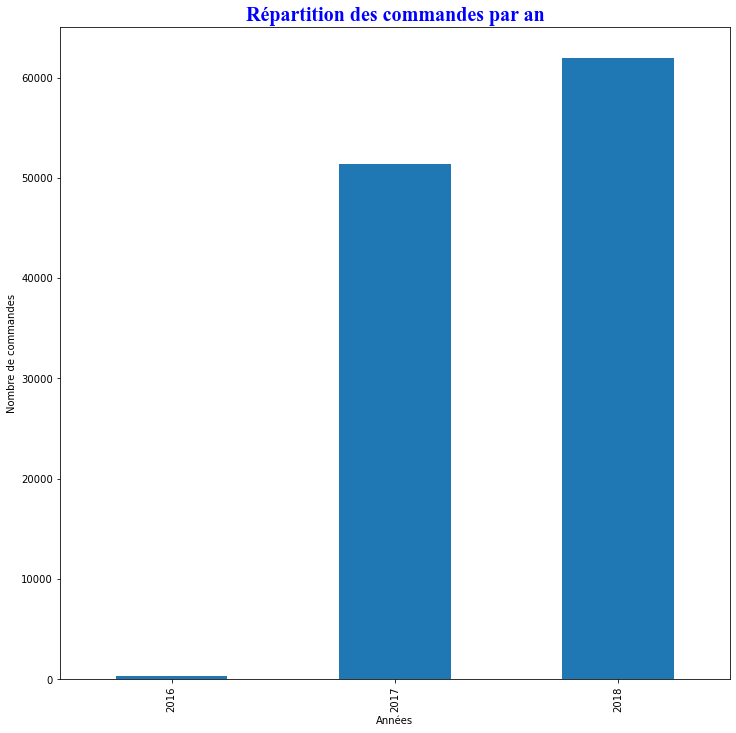

In [32]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind='bar',
    xlabel='Années',
    ylabel='Nombre de commandes',
    figsize=(12, 12))
plt.title('Répartition des commandes par an', fontdict=font_title)

In [33]:
df['Year'].value_counts()

2018    61948
2017    51361
2016      330
Name: Year, dtype: int64

Nous avons seulement 330 observations en 2016 de cette manière nous allons retirer ces données de notre dataset

In [34]:
df = df[df['Year'] != 2016]

#### Les commandes par mois

In [35]:
df['MonthY'] = df['order_purchase_timestamp'].dt.strftime('%b%Y')
df['MonthY']

0         Apr2018
1         Jun2018
2         Dec2017
3         Dec2017
5         May2018
           ...   
118309    May2018
118310    Mar2018
118311    Aug2017
118313    Aug2018
118314    Dec2017
Name: MonthY, Length: 113309, dtype: object

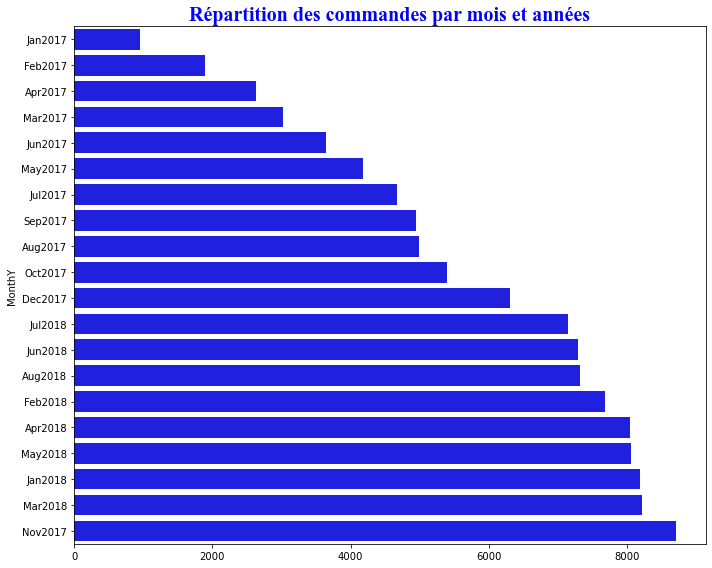

In [36]:
Month_Year = df.groupby('MonthY').size().sort_values()

fig = plt.figure(figsize=(10, 8))
sns.barplot(y=Month_Year.index, x=Month_Year.values, color='blue')
plt.title('Répartition des commandes par mois et années', fontdict=font_title)
plt.xlabel = 'Mois et années'
plt.ylabel = 'Nombre de commandes'
plt.tight_layout()

#### Les commandes par jours

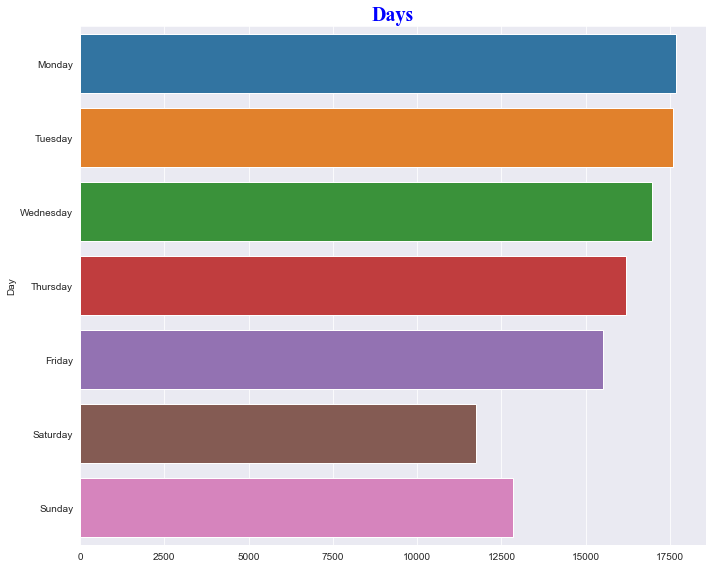

In [37]:
df['Day'] = pd.Series(pd.Categorical(
    df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
day = df.groupby('Day').size().sort_values()

fig = plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days', fontdict=font_title)
plt.tight_layout()

#### Les commandes par heures

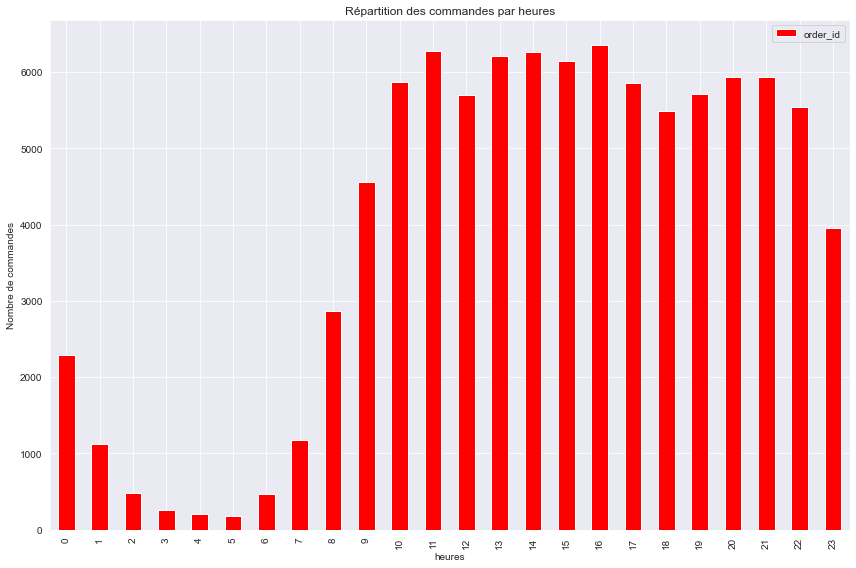

In [38]:
df.groupby(df['order_purchase_timestamp'].dt.hour).agg(
    {"order_id": 'nunique'}).plot(figsize=(12, 8), kind='bar',
                                  xlabel='heures',
                                  ylabel='Nombre de commandes',
                                  title='Répartition des commandes par heures',
                                  color='red')
plt.tight_layout()

### Les produits

In [39]:
products_top = df['product_category_name_english'].value_counts(
).reset_index().nlargest(10, 'product_category_name_english')
products_lowest = df['product_category_name_english'].value_counts(
).reset_index().nsmallest(10, 'product_category_name_english')

Les 10 produits les plus commandés et les 10 produits les moins commandés 

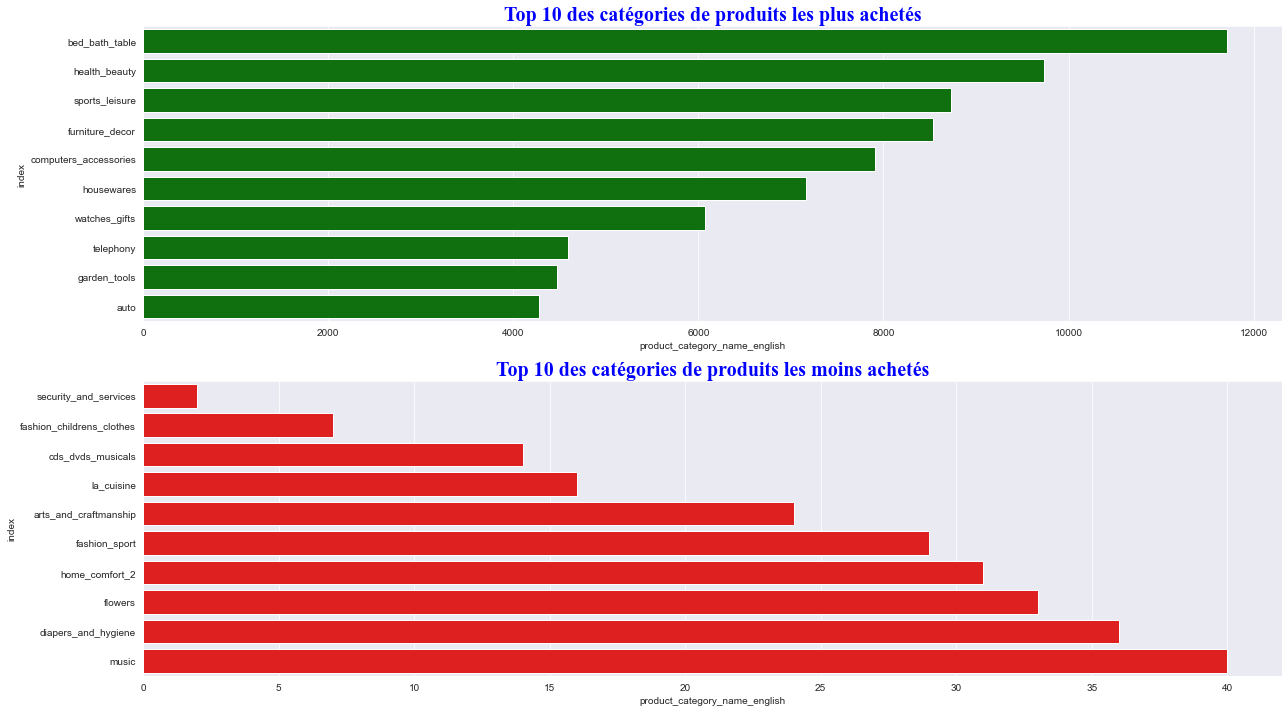

In [40]:
fig = plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.barplot(data=products_top, x='product_category_name_english',
            y='index', color='green')
plt.title('Top 10 des catégories de produits les plus achetés',
          fontdict=font_title)


plt.subplot(212)
sns.barplot(data=products_lowest,
            x='product_category_name_english', y='index', color='red')
plt.title('Top 10 des catégories de produits les moins achetés',
          fontdict=font_title)
plt.tight_layout()

In [41]:
average_price = df.groupby("product_category_name_english")[
    'price'].agg(np.mean).sort_values()

Text(0.5, 1.0, 'les prix moyens en fonction des catégories de produits ')

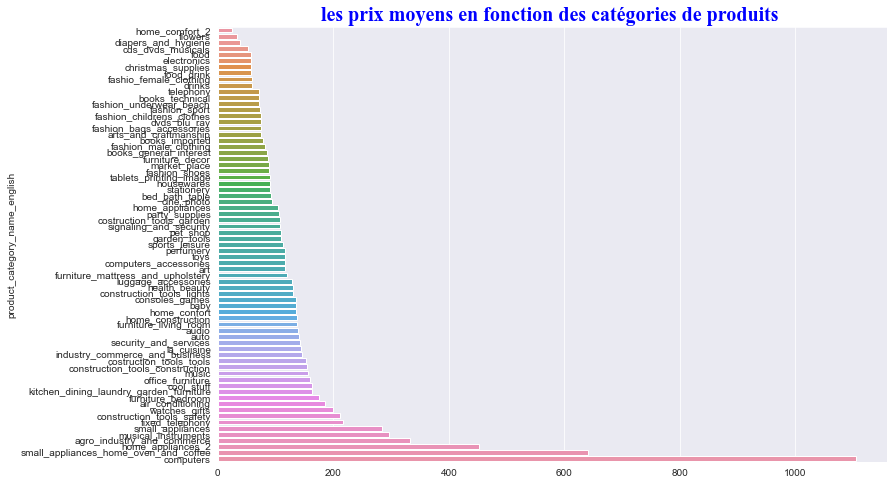

In [42]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('les prix moyens en fonction des catégories de produits ',
          fontdict=font_title)

Par la suite, nous allons utiliser la loi de Pareto (seuil 80 20) pour réduire le nombre de modalités dans cette variable 

In [43]:
produit = df.groupby(by='product_category_name_english')[['customer_unique_id']].agg(
    ['count']).sort_values(by=('customer_unique_id', 'count'), ascending=False)
produit['Percent share of customers'] = produit.apply(
    lambda x: (x/(x.sum()))*100)
produit['percent cumul'] = np.cumsum(produit['Percent share of customers'])

In [44]:
produit

,customer_unique_id,Percent share of customers,percent cumul
,count,,
product_category_name_english,,,
bed_bath_table,11717,10.340750,10.340750
health_beauty,9730,8.587138,18.927887
sports_leisure,8727,7.701948,26.629835
furniture_decor,8532,7.529852,34.159687
computers_accessories,7914,6.984441,41.144128
housewares,7168,6.326064,47.470192
watches_gifts,6067,5.354385,52.824577
telephony,4593,4.053517,56.878094


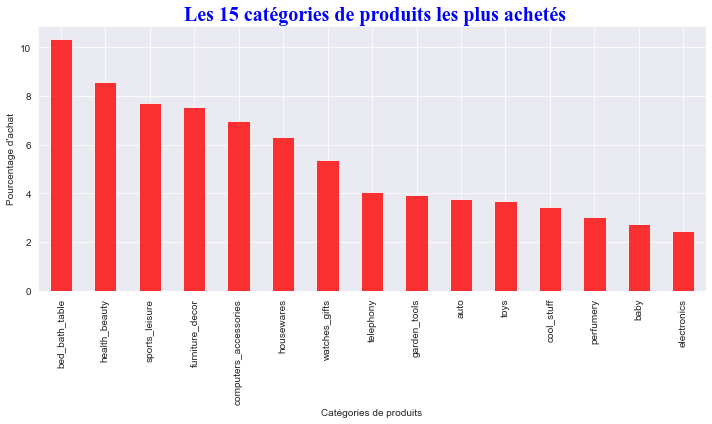

In [45]:
plt.figure(figsize=(10, 6))
produit['Percent share of customers'][0:15].plot(
    kind='bar',
    color='red',
    alpha=0.8,
    xlabel="Catégories de produits",
    ylabel="Pourcentage d'achat")
plt.title(' Les 15 catégories de produits les plus achetés', fontdict=font_title)
plt.tight_layout()

Nous allons spleeter les product category name english en 80/20, c'est à dire garder les 80% et les 20 % les joindres dans un seul label 'autre.
Nous voyons que les 80% se situe jusqu'au label'electronics' soit garder les 15 premières modalités et transformer le reste en autres

### Les moyens de payments

In [46]:
payment = df.groupby(by='payment_type')[['customer_unique_id']].agg(
    'count').sort_values(by=('customer_unique_id'), ascending=False)

payment['pourcentage de clients'] = np.round(
    payment.apply(lambda x: (x/(x.sum()))*100), 2)

payment['Payments'] = np.round(df.groupby(by='payment_type')[
                               ['payment_value']].agg(['sum']), 1)

In [47]:
payment

,customer_unique_id,pourcentage de clients,Payments
payment_type,,,
credit_card,83633,73.81,14993678.9
boleto,22036,19.45,3883887.4
voucher,6019,5.31,390804.1
debit_card,1621,1.43,241866.8


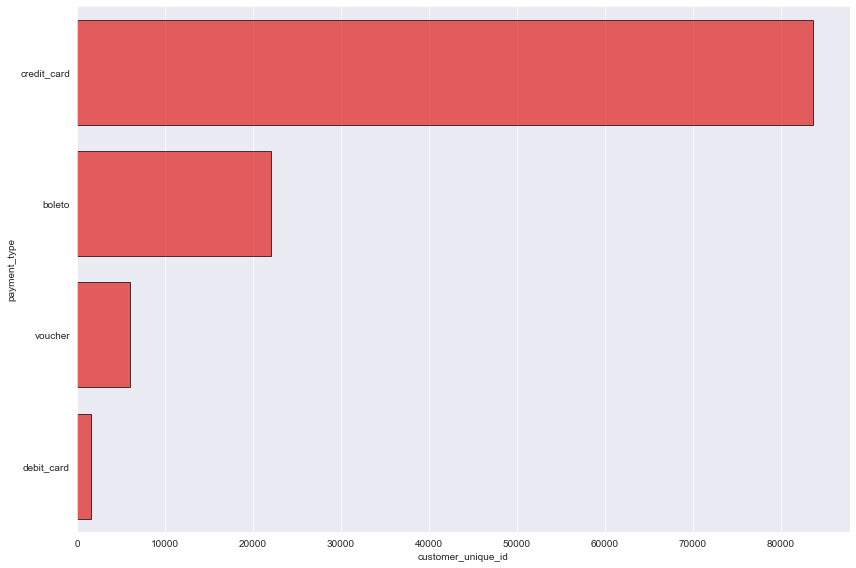

In [48]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=payment, y=payment.index, x="customer_unique_id",
            edgecolor="black",
            color="red", alpha=0.7)
plt.tight_layout()

73% des clients ont utilisés la carte de crédit comme moyen de payment, de cette manière nous allons pas introduire cette variable dans notre modèle

### Les avis clients

Text(0.5, 1.0, 'Les notes laissés par les clients')

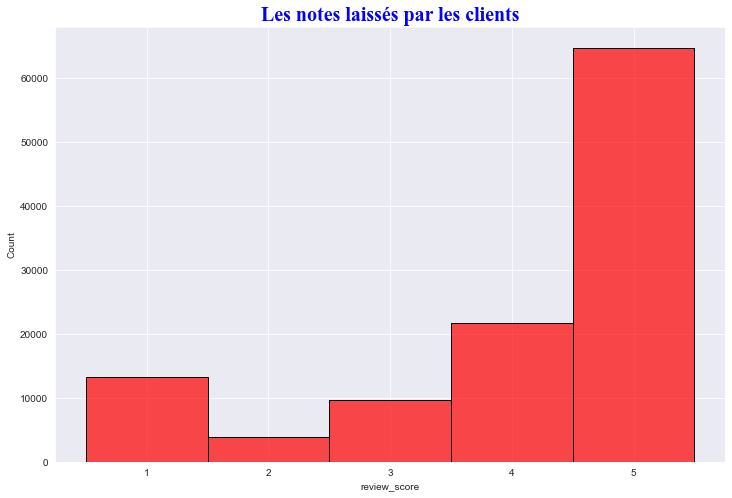

In [49]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='review_score', discrete=True,
             edgecolor="black", alpha=0.7, color='red')
plt.title("Les notes laissés par les clients",
          fontdict=font_title)

#### les avis cliens en fonction des produits

In [50]:
review_produit = df.groupby('product_category_name_english').mean()[
    'review_score'].reset_index()
top_10 = review_produit.sort_values(
    'review_score', ascending=False).nlargest(10, 'review_score')
lowest_10 = review_produit.sort_values(
    'review_score', ascending=False).nsmallest(10, 'review_score')

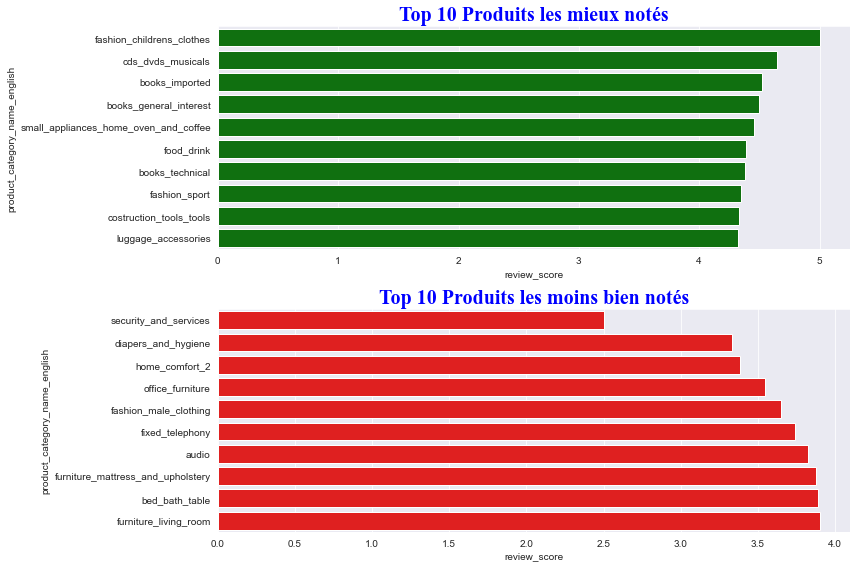

In [51]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.barplot(data=top_10, x='review_score',
            y='product_category_name_english', color='green')
plt.title('Top 10 Produits les mieux notés', fontdict=font_title)


plt.subplot(212)
sns.barplot(data=lowest_10, x='review_score',
            y='product_category_name_english', color='red')
plt.title('Top 10 Produits les moins bien notés', fontdict=font_title)
plt.tight_layout()

#### Les régions d'habitations des cliens

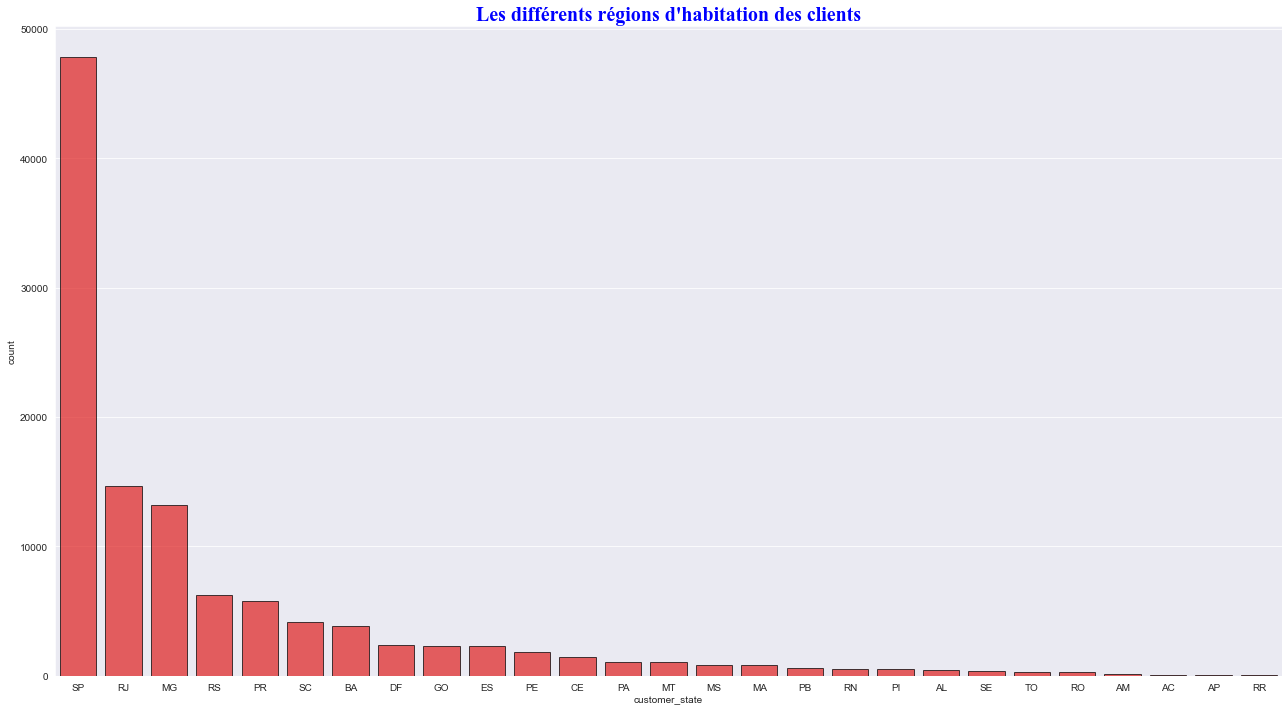

In [52]:
fig = plt.figure(figsize=(18, 10))
sns.countplot(data=df, x="customer_state",
              edgecolor="black", alpha=0.7, color='red',
              order=df['customer_state'].value_counts().index)
plt.title("Les différents régions d'habitation des clients",
          fontdict=font_title)
plt.tight_layout()

De la meme manière que les catégories de produits nous allons réaliser un regroupement de 80% et 20% en autres des régions

In [53]:
region = df.groupby(by='customer_state')[['customer_unique_id']].agg(
    ['count']).sort_values(by=('customer_unique_id', 'count'), ascending=False)
region['Percent share of customers'] = region.apply(
    lambda x: (x/(x.sum()))*100)
region['percent cumul'] = np.cumsum(region['Percent share of customers'])

In [54]:
region

,customer_unique_id,Percent share of customers,percent cumul
,count,,
customer_state,,,
SP,47815,42.198766,42.198766
RJ,14641,12.921304,55.120070
MG,13212,11.660151,66.780220
RS,6281,5.543249,72.323469
PR,5772,5.094035,77.417504
SC,4151,3.663434,81.080938
BA,3866,3.411909,84.492847
DF,2394,2.112807,86.605654


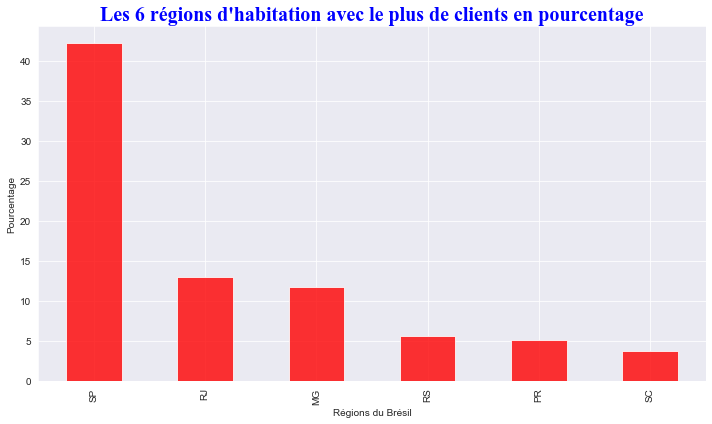

In [55]:
plt.figure(figsize=(10, 6))
region['Percent share of customers'][0:6].plot(
    kind='bar',
    xlabel='Régions du Brésil',
    ylabel='Pourcentage',
    color='red',
    alpha=0.8)
plt.title("Les 6 régions d'habitation avec le plus de clients en pourcentage",
          fontdict=font_title)
plt.tight_layout()

Nous allons de se fait garder ses 6 régions et le reste sera autres 

## Séparation de la base de données en 3

Nous allons séparer la base de données en 3 parties par la temporalité, la première 1 an et 10 mois, et les deux autres 1 mois et 1 mois 

In [56]:
print(df['order_purchase_timestamp'].min().round('1d'))
print(df['order_purchase_timestamp'].max().round('1d'))

2017-01-05 00:00:00
2018-08-30 00:00:00


notre minimum est janvier 2017 et notre maxi est aout 2018.
De ce fait notre premier base de données sera de janvier 2017 à juin 2018 puis juillet 2018 et la dernière Aout 2018

In [57]:
df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()

In [58]:
df['MonthY'].value_counts()

Nov2017    8705
Mar2018    8226
Jan2018    8185
May2018    8055
Apr2018    8042
Feb2018    7684
Aug2018    7319
Jun2018    7294
Jul2018    7143
Dec2017    6310
Oct2017    5398
Aug2017    4997
Sep2017    4940
Jul2017    4676
May2017    4185
Jun2017    3643
Mar2017    3024
Apr2017    2632
Feb2017    1894
Jan2017     957
Name: MonthY, dtype: int64

In [59]:
df_1 = (df_1.loc[df_1['MonthY'].isin(['Jan2017', 'Feb2017', "Mar2017", "Apr2017", "May2017", "Jun2017", "Jul2017", 'Aug2017',
                                      "Sep2017", "Oct2017", "Nov2017", "Dec2017",
                                      'Jan2018', 'Feb2018', "Mar2018", "Apr2018",
                                      "May2018", "Jun2018"]), :])
print("Nombre de lignes {} et {} variables".format(
    df_1.shape[0], df_1.shape[1]))

Nombre de lignes 98847 et 28 variables


In [60]:
df_2 = (df_2.loc[df_2['MonthY'].isin(['Jul2018']), :])
print("Nombre de lignes {} et {} variables".format(
    df_2.shape[0], df_2.shape[1]))

Nombre de lignes 7143 et 28 variables


In [61]:
df_3 = (df_3.loc[df_3['MonthY'].isin(['Aug2018']), :])
print("Nombre de lignes {} et {} variables".format(
    df_3.shape[0], df_3.shape[1]))

Nombre de lignes 7319 et 28 variables


In [62]:
df_2.to_csv('bdd_juillet.csv')
df_3.to_csv('bdd_aout.csv')

### Feature engering

#### Review clients

In [64]:
def categorisation(x):
    if x < 3:
        return 0
    return 1


df_1['satisfaction'] = df_1['review_score'].map(lambda x: categorisation(x))

In [65]:
review = df_1.satisfaction.value_counts()

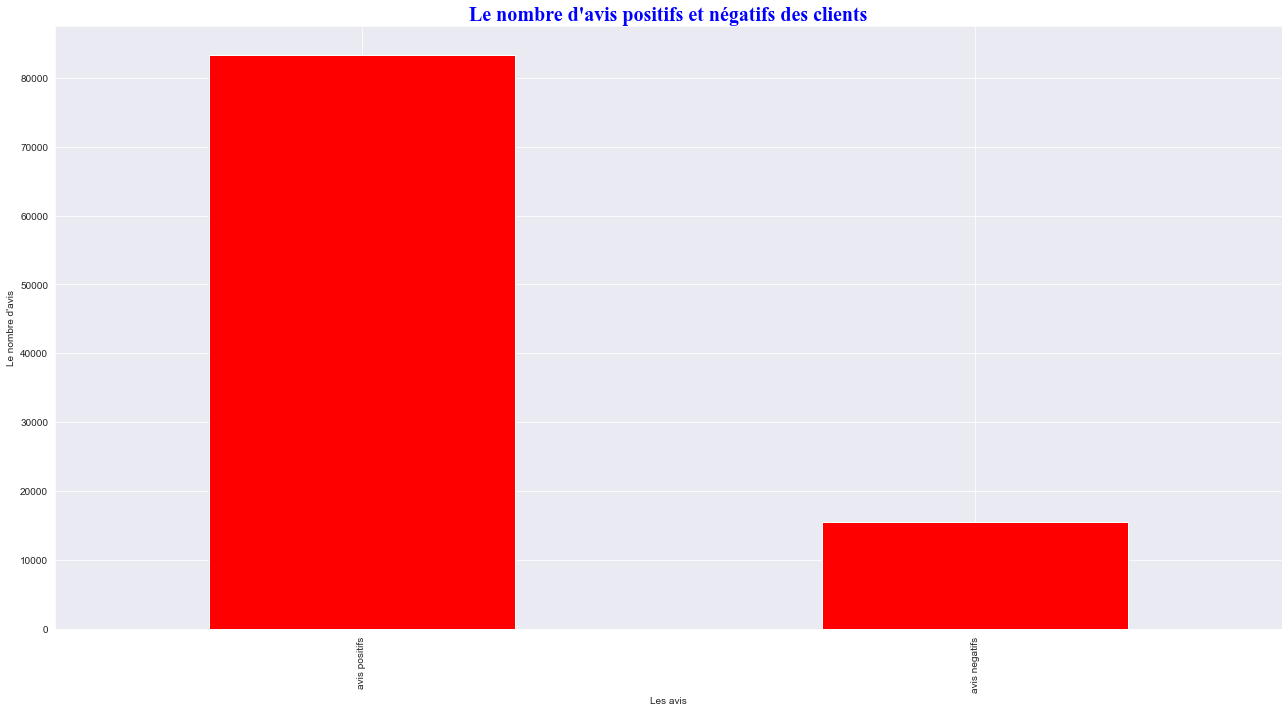

In [66]:
ax = plt.figure(figsize=(18, 10))
ax = review.plot(kind='bar', color='red')
ax.set_xticklabels(['avis positifs', 'avis negatifs'])
plt.xticks(rotation=90)
ax.set_xlabel('Les avis')
ax.set_ylabel("Le nombre d'avis")
ax.set_title("Le nombre d'avis positifs et négatifs des clients",
             fontdict=font_title)
plt.tight_layout()

#### Les temps de livraions et de retards 

In [67]:
df_1['temps_livraisons'] = (df_1.order_delivered_customer_date -
                            df_1.order_purchase_timestamp).dt.round('1d').dt.days

Text(0.5, 0.98, 'Délais de livraison moyen en jours')

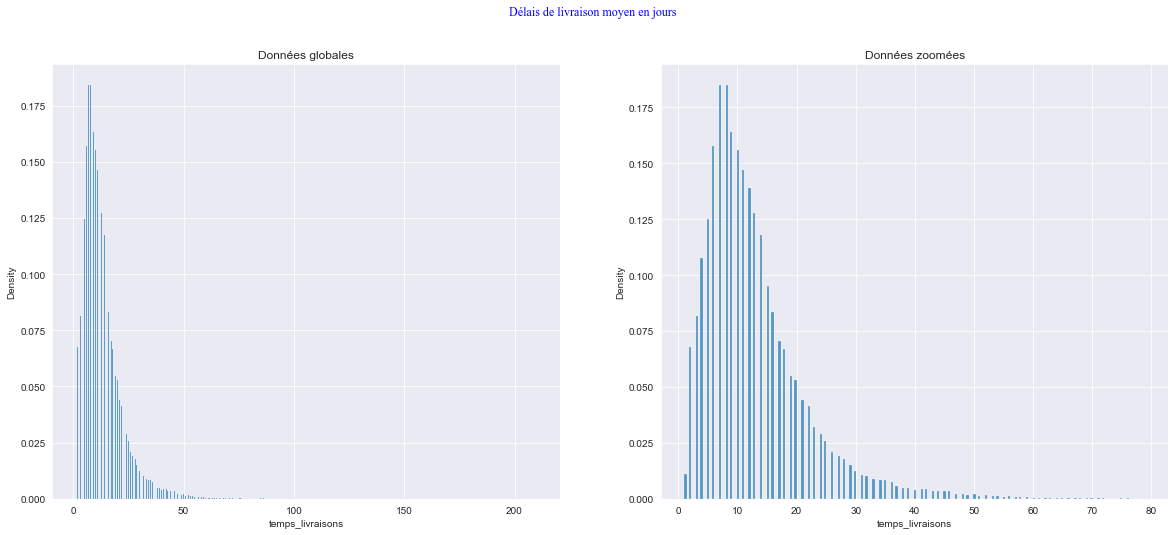

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                         sharey=False, figsize=(20, 8))
sns.histplot(data=df_1, x="temps_livraisons",
             stat="density", ax=axes[0])
axes[0].set_title('Données globales')
sns.histplot(data=df_1[(df_1['temps_livraisons'] < 80)], x="temps_livraisons",
             stat="density", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle('Délais de livraison moyen en jours',
             fontdict=font_title)

In [70]:
df_1['retard_livraisons'] = (df_1.order_delivered_customer_date -
                             df_1.order_estimated_delivery_date).dt.round('1d').dt.days

In [71]:
def retard(x):
    if x < 0:
        return 0
    return x


df_1['retard_livraisons'] = df_1['retard_livraisons'].map(lambda x: retard(x))

Text(0.5, 0.98, 'Retard de livraison moyen en jours')

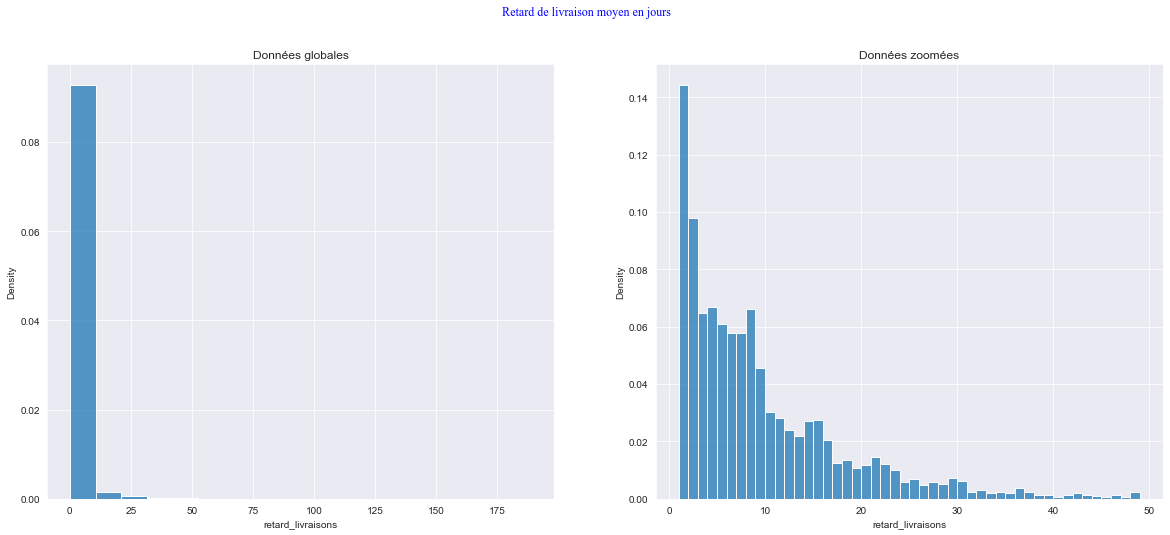

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                         sharey=False, figsize=(20, 8))
sns.histplot(data=df_1, x="retard_livraisons",
             stat="density", ax=axes[0])
axes[0].set_title('Données globales')
sns.histplot(data=df_1[((df_1['retard_livraisons'] > 0) &
                        (df_1['retard_livraisons'] < 50))],
             x="retard_livraisons",
             stat="density", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle('Retard de livraison moyen en jours',
             fontdict=font_title)

In [74]:
df_1['mois_vente'] = df_1['order_purchase_timestamp'].dt.month

### Dernier achats et rachat

Regardons le nombre de jours entre les commandes et a derniere fois qu'il a acheter par rapport à la derniere date de la base de donnée

In [75]:
recurencies = df_1.groupby("customer_unique_id")\
    .agg({"order_purchase_timestamp": ["min", "max"]})
recurencies.columns = recurencies.columns.droplevel(0)

recurencies['delay_e_commande'] = (
    recurencies["max"] - recurencies["min"]).round('1d')
recurencies['max_comma'] = df_1['order_purchase_timestamp'].max()
recurencies['order_total_delais'] = (
    recurencies['max_comma'] - recurencies['max']).round('1d')

recurencies.drop(["min", "max", 'max_comma'], axis=1, inplace=True)

In [76]:
recurencies.head(10)

,delay_e_commande,order_total_delais
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,0 days,52 days
0000b849f77a49e4a4ce2b2a4ca5be3f,0 days,55 days
0000f46a3911fa3c0805444483337064,0 days,477 days
0000f6ccb0745a6a4b88665a16c9f078,0 days,261 days
0004aac84e0df4da2b147fca70cf8255,0 days,228 days
0004bd2a26a76fe21f786e4fbd80607f,0 days,86 days
00050ab1314c0e55a6ca13cf7181fecf,0 days,71 days
00053a61a98854899e70ed204dd4bafe,0 days,123 days
0005e1862207bf6ccc02e4228effd9a0,0 days,483 days


In [77]:
recurencies['delay_e_commande'] = recurencies['delay_e_commande'].dt.days.astype(
    'int64')
recurencies['order_total_delais'] = recurencies['order_total_delais'].dt.days.astype(
    'int64')

In [80]:
recurencies['delay_e_commande'].value_counts()

0      78146
1         30
2         27
6         26
14        24
7         24
9         21
20        20
11        20
4         20
3         18
12        18
28        17
8         17
22        16
16        15
34        15
21        15
15        14
49        14
18        14
10        14
29        13
5         13
33        13
51        12
43        12
68        12
17        12
41        10
77        10
26        10
23        10
31        10
47        10
25        10
45        10
36         9
37         9
145        9
32         9
55         9
69         9
24         9
13         9
57         9
35         9
76         9
39         9
80         9
60         9
44         9
120        8
54         8
71         8
103        8
19         8
38         8
48         7
78         7
127        7
161        7
61         7
105        7
134        7
91         7
97         7
117        7
65         7
231        7
113        7
133        7
62         7
163        7
46         7
40         7
115        7

#### Nous avons pret de 98% des clients qui ont réalisé qu'une seule commande sur le site, de cette maniere nous n'allons pas garder cette variable

In [81]:
recurencies.drop(['delay_e_commande'], axis=1, inplace=True)

### Les catégories de produits

In [82]:
def noms(x):
    if x in ['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
             'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
             'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
             'electronics']:
        return x
    return 'autres'


df_1['prodcut_category_name'] = df_1['product_category_name_english'].map(
    lambda x: noms(x))

In [83]:
df_1['prodcut_category_name'].unique()

array(['autres', 'auto', 'perfumery', 'bed_bath_table', 'housewares',
       'sports_leisure', 'garden_tools', 'electronics', 'cool_stuff',
       'watches_gifts', 'baby', 'health_beauty', 'furniture_decor',
       'telephony', 'toys', 'computers_accessories'], dtype=object)

In [84]:
df_1.drop("product_category_name_english", axis=1, inplace=True)

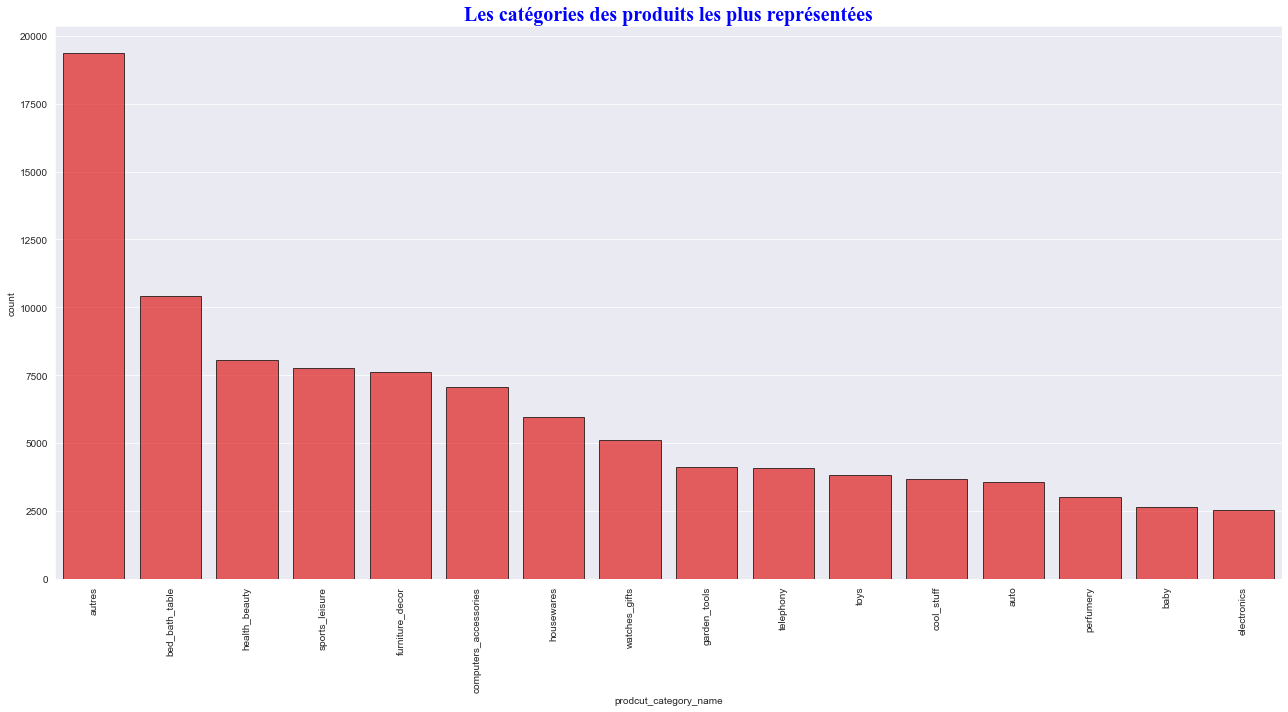

In [85]:
fig = plt.figure(figsize=(18, 10))
sns.countplot(data=df_1, x="prodcut_category_name",
              edgecolor="black", alpha=0.7, color='red',
              order=df_1['prodcut_category_name'].value_counts().index)
plt.title("Les catégories des produits les plus représentées",
          fontdict=font_title)
plt.xticks(rotation=90)
plt.tight_layout()

### Nombre de produits acheter au total 

In [86]:
categories_client = df_1.groupby(["customer_unique_id", "prodcut_category_name"]).agg({
    'order_item_id': 'count'}).unstack()
categories_client.fillna(0, inplace=True)
categories_client.columns = categories_client.columns.droplevel(0)
categories_client["total_items"] = categories_client.sum(axis=1)

In [87]:
products_per_order = df_1.groupby(["customer_unique_id", 'order_id']).agg({
    "order_item_id": "count"})

In [88]:
products_per_order.value_counts()

order_item_id
1                71643
2                 8150
3                 1327
4                  699
6                  228
5                  209
7                   40
8                   34
12                  21
10                  11
11                  11
9                   10
15                   5
14                   4
24                   4
20                   3
21                   3
13                   3
16                   2
19                   1
22                   1
26                   1
38                   1
63                   1
dtype: int64

<AxesSubplot:xlabel='order_item_id', ylabel='Count'>

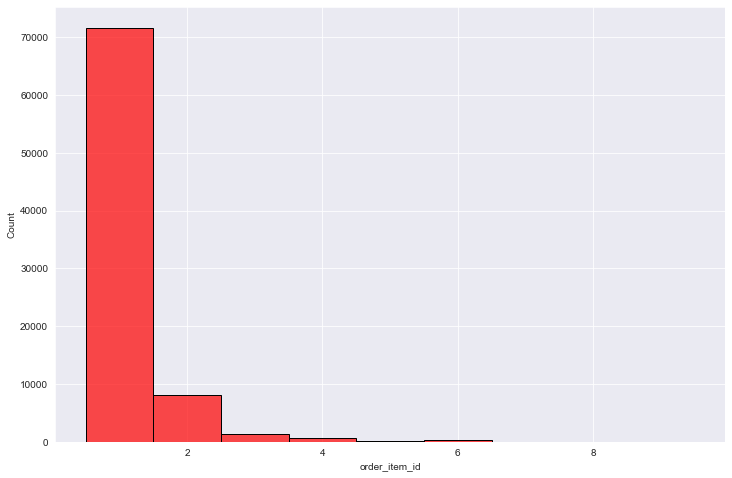

In [89]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=products_per_order[(products_per_order['order_item_id'] < 10)], x="order_item_id",
             discrete=True,
             edgecolor="black",
             color="red", alpha=0.7)

In [90]:
products_per_order = products_per_order.rename(
    columns={"order_item_id": "products_per_order_mean"})

In [91]:
products_per_order = products_per_order.groupby("customer_unique_id")\
    .agg({"products_per_order_mean": "mean"})

In [92]:
products_per_order.value_counts()

products_per_order_mean
1.000000                   69239
2.000000                    7608
3.000000                    1223
4.000000                     628
1.500000                     401
6.000000                     209
5.000000                     199
2.500000                      40
7.000000                      38
1.666667                      26
8.000000                      24
1.333333                      19
12.000000                     19
3.500000                      12
10.000000                     11
9.000000                      10
11.000000                      8
2.333333                       7
4.500000                       6
5.500000                       5
14.000000                      4
2.666667                       4
1.250000                       3
1.750000                       3
13.000000                      3
15.000000                      3
24.000000                      3
21.000000                      3
20.000000                      3
1.800000           

#### Régions du Brésil 

In [93]:
def noms(x):
    if x in ['SP', 'RJ', 'MG', 'RS',
             'PR', 'SC']:
        return x
    return 'autres'


df_1['customer_state'] = df_1['customer_state'].map(lambda x: noms(x))

In [94]:
df_f = df_1.reindex(columns=["customer_unique_id",
                    "customer_state", 'mois_vente'])
df_f.head()

,customer_unique_id,customer_state,mois_vente
0,708ab75d2a007f0564aedd11139c7708,MG,4
1,a8b9d3a27068454b1c98cc67d4e31e6f,SP,6
2,6f70c0b2f7552832ba46eb57b1c5651e,SP,12
3,87695ed086ebd36f20404c82d20fca87,MG,12
5,4291db0da71914754618cd789aebcd56,SP,5


### Ramener la base de données principale à la base client

In [95]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98847 entries, 0 to 118314
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98847 non-null  object        
 1   payment_sequential             98847 non-null  int64         
 2   payment_type                   98847 non-null  object        
 3   payment_installments           98847 non-null  int64         
 4   payment_value                  98847 non-null  float64       
 5   customer_id                    98847 non-null  object        
 6   order_status                   98847 non-null  object        
 7   order_purchase_timestamp       98847 non-null  datetime64[ns]
 8   order_approved_at              98847 non-null  datetime64[ns]
 9   order_delivered_carrier_date   98846 non-null  datetime64[ns]
 10  order_delivered_customer_date  98847 non-null  datetime64[ns]
 11  order_estimate

### Renommons les colonnes 

In [96]:
df_1 = df_1.rename(columns={"order_id": "nb_commandes",
                            "retard_livraisons": "retard_livraisons_mean",
                            "temps_livraisons": "temps_livraisons_mean",
                            "satisfaction": "satisfaction_mean",
                            "review_score": "review_score_mean",
                            "freight_value": "fdp_total",
                            "price": "price_total",
                            "payment_sequential": "moyen_payment_mean",
                            "payment_installments": "versement_payment_mean"
                            })

In [97]:
df_1 = df_1.groupby('customer_unique_id')\
    .agg({'nb_commandes': 'nunique',
          'retard_livraisons_mean': 'mean',
          'temps_livraisons_mean': 'mean',
          'satisfaction_mean': 'mean',
          'review_score_mean': 'mean',
          'fdp_total': 'sum',
          'price_total': 'sum',
          'moyen_payment_mean': 'mean',
          'versement_payment_mean': 'mean',
          'Year': lambda x: x.value_counts().index[0]})

df_1 = pd.merge(df_1, categories_client,
                how="left",
                on="customer_unique_id")

df_1 = pd.merge(df_1, products_per_order,
                how='left',
                on='customer_unique_id')

df_1 = pd.merge(df_1, df_f,
                how='left',
                on='customer_unique_id')

df_1 = pd.merge(df_1, recurencies,
                how='left',
                on='customer_unique_id')

### Valeurs dupliquées

In [99]:
df_1.drop_duplicates(subset="customer_unique_id", keep="first", inplace=True)

In [100]:
print("Nombre de lignes {} et {} variables".format(
    df_1.shape[0], df_1.shape[1]))

Nombre de lignes 79786 et 32 variables


### Valeurs atypiques

In [101]:
df_1.describe()

,nb_commandes,retard_livraisons_mean,temps_livraisons_mean,satisfaction_mean,review_score_mean,fdp_total,price_total,moyen_payment_mean,versement_payment_mean,Year,auto,autres,baby,bed_bath_table,computers_accessories,cool_stuff,electronics,furniture_decor,garden_tools,health_beauty,housewares,perfumery,sports_leisure,telephony,toys,watches_gifts,total_items,products_per_order_mean,mois_vente,order_total_delais
count,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.00000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000
mean,1.032913,0.862792,13.140856,0.863733,4.117852,24.462618,148.531565,1.023744,2.925684,2017.484120,0.044519,0.242837,0.033239,0.130512,0.088487,0.045898,0.031747,0.09548,0.051826,0.101233,0.074549,0.037952,0.097423,0.051225,0.048079,0.063896,1.238902,1.194771,5.799865,207.501617
std,0.204529,5.084647,9.860367,0.341480,1.305120,26.191101,244.746403,0.191807,2.698737,0.499751,0.251133,0.602766,0.210992,0.511961,0.394060,0.247160,0.213377,0.44222,0.329204,0.370081,0.371285,0.226387,0.374397,0.261878,0.246491,0.288273,0.849754,0.721054,3.390586,136.658523
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.850000,1.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,7.000000,1.000000,4.000000,14.100000,48.900000,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,95.000000
50%,1.000000,0.000000,11.000000,1.000000,5.000000,17.600000,89.900000,1.000000,2.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,190.000000
75%,1.000000,0.000000,16.000000,1.000000,5.000000,26.410000,159.900000,1.000000,4.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,307.000000
max,9.000000,189.000000,210.000000,1.000000,5.000000,1405.980000,13440.000000,13.500000,24.000000,2018.000000,20.000000,38.000000,12.000000,42.000000,24.000000,12.000000,22.000000,24.00000,35.000000,21.000000,21.000000,12.000000,21.000000,14.000000,8.000000,12.000000,75.000000,38.000000,12.000000,542.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a92e297f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a92e29ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9abb71da30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a92e29a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a92e21910>],
 'means': []}

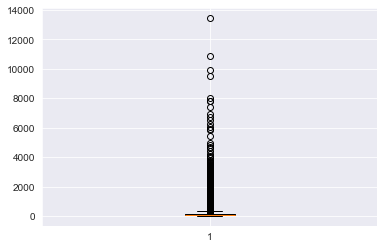

In [102]:
plt.boxplot(df_1["price_total"])

In [103]:
borne = round(np.percentile(df_1["price_total"].values, 99), 2)
df_1 = df_1.loc[df_1["price_total"] < borne]

In [104]:
df_1.describe()

,nb_commandes,retard_livraisons_mean,temps_livraisons_mean,satisfaction_mean,review_score_mean,fdp_total,price_total,moyen_payment_mean,versement_payment_mean,Year,auto,autres,baby,bed_bath_table,computers_accessories,cool_stuff,electronics,furniture_decor,garden_tools,health_beauty,housewares,perfumery,sports_leisure,telephony,toys,watches_gifts,total_items,products_per_order_mean,mois_vente,order_total_delais
count,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.00000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000,78978.000000
mean,1.032351,0.859341,13.124261,0.864338,4.119297,23.724128,131.598502,1.020973,2.895514,2017.484477,0.043569,0.236218,0.033110,0.129492,0.086986,0.045722,0.031882,0.095166,0.051369,0.100724,0.074274,0.038137,0.09747,0.051432,0.048343,0.062612,1.226506,1.184597,5.798906,207.408354
std,0.202431,5.073931,9.845912,0.340868,1.303174,21.710636,141.884984,0.153002,2.665449,0.499762,0.234773,0.551042,0.209503,0.466141,0.372123,0.241337,0.213434,0.425023,0.305576,0.362948,0.359065,0.223331,0.37143,0.261172,0.246824,0.280849,0.718269,0.629149,3.392592,136.568546
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.850000,1.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,7.000000,1.000000,4.000000,14.100000,48.890000,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,95.000000
50%,1.000000,0.000000,11.000000,1.000000,5.000000,17.540000,89.900000,1.000000,2.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,190.000000
75%,1.000000,0.000000,16.000000,1.000000,5.000000,25.940000,158.000000,1.000000,4.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,307.000000
max,9.000000,189.000000,210.000000,1.000000,5.000000,1002.290000,1098.900000,11.500000,24.000000,2018.000000,6.000000,15.000000,12.000000,21.000000,24.000000,12.000000,22.000000,14.000000,15.000000,21.000000,16.000000,7.000000,21.00000,14.000000,8.000000,12.000000,24.000000,24.000000,12.000000,542.000000


In [105]:
borne = round(np.percentile(df_1["fdp_total"].values, 99), 2)
df_1 = df_1.loc[df_1["fdp_total"] < borne]

In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78188 entries, 0 to 98846
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_unique_id       78188 non-null  object 
 1   nb_commandes             78188 non-null  int64  
 2   retard_livraisons_mean   78188 non-null  float64
 3   temps_livraisons_mean    78188 non-null  float64
 4   satisfaction_mean        78188 non-null  float64
 5   review_score_mean        78188 non-null  float64
 6   fdp_total                78188 non-null  float64
 7   price_total              78188 non-null  float64
 8   moyen_payment_mean       78188 non-null  float64
 9   versement_payment_mean   78188 non-null  float64
 10  Year                     78188 non-null  int64  
 11  auto                     78188 non-null  float64
 12  autres                   78188 non-null  float64
 13  baby                     78188 non-null  float64
 14  bed_bath_table        

## Exportation du dataset final

In [107]:
df_1.to_csv('customers-segmentation-general.csv')

3 dataset 1an et 8 mois et puis 2 mois mois 